<a href="https://colab.research.google.com/github/axellebersier/2022_ML_EES/blob/main/project/datadescrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Machine Learning : Feature selection for population dynamic analysis**


##Problematic

What are the important features to consider to analyze the population dynamic of Switzerland ? 

##Data description

Set up and load the data

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/axellebersier/2022_ML_EES/main/project/data.csv'
df = pd.read_csv(url, delimiter=';')



##Data Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N_communes         2198 non-null   object 
 1   N_pop              2198 non-null   float64
 2   D_pop              2198 non-null   float64
 3   N_kids             2198 non-null   float64
 4   W_pop              2198 non-null   float64
 5   N_retired          2198 non-null   float64
 6   N_foreigners       2198 non-null   float64
 7   Natural_growth     2198 non-null   float64
 8   N_wedding          2198 non-null   float64
 9   N_death            2198 non-null   float64
 10  Prop_fam           2198 non-null   float64
 11  M_home             2198 non-null   float64
 12  S_primary          2198 non-null   object 
 13  S_tertiary         2198 non-null   object 
 14  N_nlog             2198 non-null   float64
 15  N_indivihome       2198 non-null   float64
 16  little_house       2198 

In [6]:
df.describe()

,N_pop,D_pop,N_kids,W_pop,N_retired,N_foreigners,Natural_growth,N_wedding,N_death,Prop_fam,M_home,N_nlog,N_indivihome,little_house,N_cinema,Migratory_balance
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.00000,2198.000000,2198.000000
mean,3944.631483,441.098908,785.396269,2417.802093,741.433121,1005.818016,4.421747,15.996360,34.665605,6.354959,2.304613,22.435851,59.383258,50.47434,0.119654,8.297316
std,12832.581553,795.711671,2315.055711,8463.505065,2090.630990,4498.971352,42.836565,61.877402,116.070124,2.481014,0.188803,65.231776,13.611301,8.10201,0.665671,20.955043
min,32.000000,0.800000,1.000000,19.000000,5.000000,0.000000,-275.000000,0.000000,0.000000,0.000000,1.520000,0.000000,0.000000,15.70000,0.000000,-107.000000
25%,721.250000,82.700000,143.000000,429.250000,139.000000,80.000000,-3.000000,2.000000,5.000000,4.800000,2.190000,1.000000,51.425000,45.20000,0.000000,-3.100000
50%,1555.500000,185.750000,328.000000,957.000000,311.000000,231.000000,1.000000,6.000000,13.000000,6.000000,2.300000,5.000000,61.500000,50.60000,0.000000,6.200000
75%,3843.750000,470.725000,798.750000,2310.250000,738.500000,755.500000,7.000000,15.000000,31.000000,7.500000,2.420000,21.000000,68.900000,56.00000,0.000000,17.875000
max,421878.000000,12797.000000,74392.000000,285786.000000,61700.000000,136743.000000,1574.000000,2212.000000,3605.000000,28.600000,3.220000,1772.000000,96.200000,85.80000,17.000000,141.900000


In [7]:
df.head()

,N_communes,N_pop,D_pop,N_kids,W_pop,N_retired,N_foreigners,Natural_growth,N_wedding,N_death,Prop_fam,M_home,S_primary,S_tertiary,N_nlog,N_indivihome,little_house,N_social,N_cinema,Migratory_balance
0,Aeugst am Albis,2014.0,254.6,382.0,1258.0,374.0,290.0,-2.0,5.0,12.0,4.7,2.28,14.00,108.00,10.0,69.2,42.3,26.00,0.0,14.5
1,Affoltern am Albis,12289.0,1160.4,2482.0,7523.0,2284.0,3564.0,26.0,59.0,125.0,5.5,2.19,23.00,857.00,56.0,54.7,60.9,392.00,1.0,-0.5
2,Bonstetten,5610.0,755.0,1350.0,3327.0,933.0,971.0,26.0,26.0,35.0,5.2,2.37,16.00,235.00,1.0,71.6,55.3,63.00,0.0,0.5
3,Hausen am Albis,3801.0,279.5,840.0,2270.0,691.0,602.0,8.0,10.0,19.0,6.7,2.39,34.00,199.00,5.0,69.1,43.7,47.00,0.0,10.9
4,Hedingen,3795.0,581.2,820.0,2330.0,645.0,659.0,2.0,7.0,20.0,6.5,2.38,11.00,158.00,4.0,74.7,47.6,48.00,0.0,2.1


In [8]:
x = np.array([[1, 2], [3, 4]])
print(x)

a = [1, 2]
b = [3, 4]

y = np.array([a, b])
print(y)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [9]:
#df1 <- np.asmatrix(df[2:7,:])
df1 =  df.iloc[:,[2,3,4,5,6,7,8,9,10,11,14,15,16,18,19]]
print(df1)
df1 = np.asmatrix(df1)
print(df1)

       D_pop  N_kids   W_pop  N_retired  N_foreigners  Natural_growth  \
0      254.6   382.0  1258.0      374.0         290.0            -2.0   
1     1160.4  2482.0  7523.0     2284.0        3564.0            26.0   
2      755.0  1350.0  3327.0      933.0         971.0            26.0   
3      279.5   840.0  2270.0      691.0         602.0             8.0   
4      581.2   820.0  2330.0      645.0         659.0             2.0   
...      ...     ...     ...        ...           ...             ...   
2193    61.2    97.0   318.0      145.0          40.0             1.0   
2194    53.9   269.0   654.0      318.0         116.0           -11.0   
2195    20.5   230.0   719.0      314.0          93.0            -8.0   
2196    26.8   187.0   605.0      304.0          85.0            -2.0   
2197    36.5   235.0   622.0      278.0          68.0             4.0   

      N_wedding  N_death  Prop_fam  M_home  N_nlog  N_indivihome  \
0           5.0     12.0       4.7    2.28    10.0     

In [10]:
df1 = pd.DataFrame(df1)
corr_matrix = df.corr()
print(corr_matrix)

                      N_pop     D_pop    N_kids     W_pop  N_retired  \
N_pop              1.000000  0.490884  0.997259  0.999189   0.988807   
D_pop              0.490884  1.000000  0.507885  0.479303   0.510345   
N_kids             0.997259  0.507885  1.000000  0.995221   0.985010   
W_pop              0.999189  0.479303  0.995221  1.000000   0.982803   
N_retired          0.988807  0.510345  0.985010  0.982803   1.000000   
N_foreigners       0.975390  0.533100  0.973496  0.976562   0.955666   
Natural_growth     0.773482  0.298850  0.777000  0.791325   0.683809   
N_wedding          0.984748  0.430725  0.976547  0.987465   0.965585   
N_death            0.990565  0.490581  0.984636  0.987278   0.993093   
Prop_fam          -0.091944 -0.128236 -0.079117 -0.088127  -0.119990   
M_home            -0.149796 -0.140038 -0.133529 -0.144196  -0.187857   
N_nlog             0.771183  0.449872  0.780196  0.768271   0.759484   
N_indivihome      -0.177770 -0.154556 -0.174866 -0.175708  -0.18

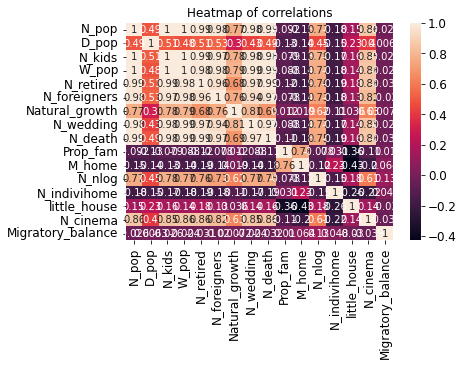

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (10,15)
plt.show()


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df1)

PCA(n_components=5)

In [13]:
print(pca.components_)

[[ 3.94149780e-02  2.29498009e-01  8.42013578e-01  2.04650597e-01
   4.41254498e-01  3.34166842e-03  6.04691498e-03  1.14178090e-02
  -2.16646984e-05 -2.72950036e-06  4.96818402e-03 -2.41492951e-04
   1.15785972e-04  5.66367645e-05 -4.96843504e-05]
 [ 4.35488279e-01 -7.05246424e-02 -3.90130001e-01 -1.21455262e-01
   7.98910595e-01 -3.85967190e-03 -9.68188437e-03 -4.43018433e-03
   2.82164190e-05  2.48494812e-07 -6.01072554e-03 -7.53802702e-04
   5.05989013e-06 -6.79932552e-05  5.74705026e-04]
 [ 8.56725578e-01  1.57122025e-01  4.55167311e-02  3.01014152e-01
  -3.85019929e-01 -9.77472184e-03  1.10087816e-03  7.26767618e-03
  -5.39060650e-04 -3.57111589e-05  1.58321112e-02 -1.33379231e-03
   3.16383207e-03  3.78794524e-05  1.73556545e-05]
 [ 2.58324283e-01 -1.11303197e-01  3.07487974e-01 -8.95705946e-01
  -1.36337887e-01  6.25588097e-02  1.05878121e-02 -3.57995610e-02
   7.81493362e-04  1.06718196e-04  1.12789443e-02  1.81862998e-03
  -2.86556786e-03 -8.49576819e-05  2.73313357e-03]
 [-8

In [14]:
print(pca.explained_variance_)

[1.00830419e+08 8.52915592e+05 4.17593356e+05 1.19332703e+05
 3.63383725e+04]


##Analysis with KMeans

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
stdf1 = scaler.fit_transform(df1)
print(stdf1)

[[-0.23443334 -0.17428871 -0.13706685 ... -1.00915699 -0.17979062
   0.29606695]
 [ 0.90417773  0.73302331  0.60333864 ...  1.28709192  1.32279409
  -0.41991408]
 [ 0.39458077  0.24393893  0.10745014 ...  0.59574816 -0.17979062
  -0.37218201]
 ...
 [-0.52870233 -0.23996081 -0.20076654 ... -0.12028644 -0.17979062
  -0.0189647 ]
 [-0.52078309 -0.25853911 -0.21423921 ... -0.39188578 -0.17979062
   0.21492244]
 [-0.50858997 -0.23780055 -0.21223013 ... -0.8610119  -0.17979062
  -0.85904912]]


In [17]:
stdf1.shape

(2198, 15)

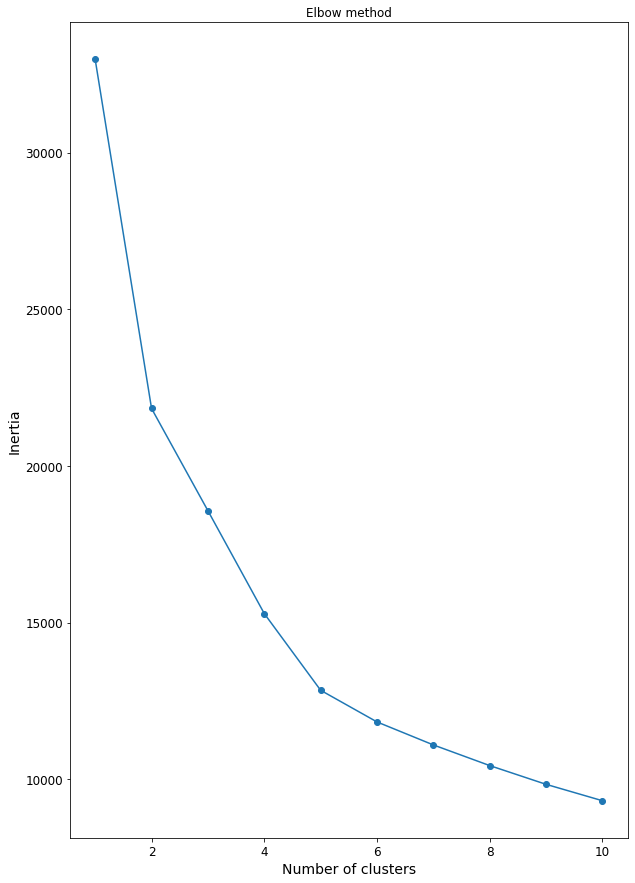

In [18]:
from sklearn.cluster import KMeans


inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stdf1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(stdf1)
print(kmeans)
#plt.scatter(x, y, c=kmeans.labels_)
#plt.show()

KMeans(n_clusters=5)


https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation 

In [24]:
y_pred = kmeans.predict(stdf1)
print(y_pred)



[3 4 0 ... 0 0 3]


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#examples-using-sklearn-metrics-silhouette-score

the number of the curve is largest is the better

W4_s1 of the python lesson